<!--BOOK_INFORMATION-->
<img style="float: right; width: 100px" src="https://raw.github.com/pyomeca/design/master/logo/logo_cropped.svg?sanitize=true">

# Pyosim in the cloud
## with [pyomeca](https://github.com/pyomeca/pyomeca)
Romain Martinez (martinez.staps@gmail.com | [GitHub](https://github.com/romainmartinez))


<!--NAVIGATION-->
< [Verification](01.00-verification.ipynb) | [Contents](Index.ipynb) | [Inverse kinematics](01.02-inverse-kinematics.ipynb) >

# Raw data

We want at least:

- 50% men; 50% women
- weight

In [1]:
from pathlib import Path
import pandas as pd
import altair as alt

In [2]:
PROJECT = Path("/home/romain/Downloads/irsst/")
MODEL = "wu_"
EXT = ".mot"

In [3]:
def parse_conditions(df):
    x = df.copy()
    x["trial"] = x["trial"].str.replace(MODEL, "").str.replace(EXT, "")
    x["participant"] = x["trial"].str[:4].str.lower()
    x["sex"] = x["trial"].str[4].replace({"F": "W", "H": "M"})
    x["height"] = x["trial"].str[-3]
    x["weight"] = x["trial"].str[5:].str.split("H").str[0]
    x["n_trial"] = x["trial"].str[-1]
    return x

In [25]:
verif = (
    pd.read_csv(PROJECT / "verification.csv", index_col=[0])
    .pipe(parse_conditions)
    .assign(tag=lambda x: x["tag"].replace({1: "good", 2: "medium", 3: "bad"}))
)

In [26]:
verif.head()

,filename,trial,tag,note,participant,sex,height,weight,n_trial
0,NaN,JawRH12H2_1,bad,NaN,jawr,M,2,12,1
1,NaN,GabFH6H2_2,bad,@ 60 shoulder ele,gabf,M,2,6,2
2,NaN,GabFH18H2_3,bad,NaN,gabf,M,2,18,3
3,NaN,AleBH12H2_2,bad,NaN,aleb,M,2,12,2
4,NaN,AleBH12H2_1,bad,NaN,aleb,M,2,12,1


In [27]:
verif.groupby('tag').size()

tag
bad        58
good      194
medium     50
dtype: int64

In [38]:
(verif.groupby('sex').size() / verif.shape[0] * 100).round()

sex
M    62.0
W    38.0
dtype: float64

In [29]:
verif.groupby(["tag", "weight", "sex"]).size()

tag     weight  sex
bad     12      M      13
                W       9
        18      M      19
        6       M      12
                W       5
good    12      M      42
                W      35
        18      M      33
        6       M      44
                W      40
medium  12      M       7
                W      13
        18      M      11
        6       M       7
                W      12
dtype: int64

- Essais taggés comme "bons": 194 (64%)
    - 6 kg: 44 essais hommes | 40 essais femmes
    - 12 kg: 42 essais hommes | 35 essais femmes
    - 18 kg: 33 essais hommes

- Essais taggés comme "moyens":  50 (17%)

- Essais taggés comme "à chier": 58 (19%)

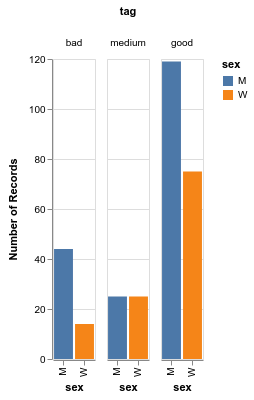

In [42]:
alt.Chart(verif).mark_bar().encode(
    alt.X("sex"),
    alt.Y("count()"),
    alt.Color("sex"),
    alt.Column("tag", sort=alt.Sort(["good", "medium", "bad"])),
    alt.Tooltip("count()"),
)

<!--NAVIGATION-->
< [Verification](01.00-verification.ipynb) | [Contents](Index.ipynb) | [Inverse kinematics](01.02-inverse-kinematics.ipynb) >